Termistores são sensores usados para medir temperatura. Os termistores são baseados em materiais que mudam a resistência elétrica de acordo com a temperatura. Para medir a temperatura, os fabricantes fornecem uma curva de temperatura $\times$ resistência. Um fabricante fez uma série de observações e obteve a seguinte tabela: 

| R(ohm) | T(ºC) |
|--------|--------|
|1101.0|25.113
| 911.3  | 30.131 |
| 636.0  | 40.120 |
| 451.1  | 50.128 |

Determine a temperatura correspondente a 754.8 ohms:

<img  src = "imagens/diferencas_divididas.png" style = "display:block; margin-left:auto; margin-right:auto;"/>

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

In [2]:
xi = np.array([451.1,636,911.3,1101],dtype = float)
yi = np.array([50.128,40.120,30.131,25.113], dtype = float)
xi,yi

(array([ 451.1,  636. ,  911.3, 1101. ]),
 array([50.128, 40.12 , 30.131, 25.113]))

In [3]:
x = sympy.Symbol('x')
x

x

In [4]:
def dd(x,y):
    if len(x) == 1:
        return y[0]
    else:
        return (dd(x[1:],y[1:]) - dd(x[:-1],y[:-1])) / (x[-1] - x[0])

# o polinômio de Newton


$$P_3(x) = f[x_0] + f[x_1,x_0](x-x_0) + f[x_2,x_1,x_0](x-x_0)(x-x_1) + f[x_3,x_2,x_1,x_0](x-x_0)(x-x_1)(x-x_2)$$


In [5]:
px = yi[0] + dd(xi[0:2],yi[0:2]) * (x - xi[0]) + dd(xi[0:3],yi[0:3]) * (x - xi[0])*(x - xi[1]) +\
dd(xi[0:4],yi[0:4]) * (x - xi[0]) * (x - xi[1]) * (x - xi[2])

In [6]:
px

-0.0541265548945376*x + (1.2235448980093e-5 - 2.71235845269186e-8*x)*(x - 911.3)*(x - 636.0) + (3.87711889070025e-5*x - 0.0174896833159488)*(x - 636.0) + 74.5444889129259

In [7]:
px = sympy.simplify(px)
px

-2.71235845269186e-8*x**3 + 9.29749602255966e-5*x**2 - 0.130927096122724*x + 92.7594322228047

In [11]:
px.subs(x,911.3)

30.1310000000000

In [12]:
Px = yi[0]
for i in range(2,len(xi) + 1):
    termo = dd(xi[0:i],yi[0:i])
    for j in range(i - 1):
        termo *= (x - xi[j])
    Px += termo

In [13]:
Px

-0.0541265548945376*x + (1.2235448980093e-5 - 2.71235845269186e-8*x)*(x - 911.3)*(x - 636.0) + (3.87711889070025e-5*x - 0.0174896833159488)*(x - 636.0) + 74.5444889129259

In [14]:
Px = sympy.simplify(Px)
Px

-2.71235845269186e-8*x**3 + 9.29749602255966e-5*x**2 - 0.130927096122724*x + 92.7594322228047

In [15]:
print(Px)

-2.71235845269186e-8*x**3 + 9.29749602255966e-5*x**2 - 0.130927096122724*x + 92.7594322228047


In [16]:
def polinomio(x):
    return -2.71235845269186e-8*x**3 + 9.29749602255966e-5*x**2 - 0.130927096122724*x + 92.7594322228047

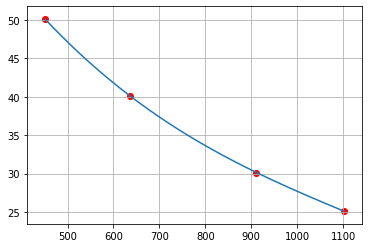

In [18]:
xa = np.arange(xi[0],xi[-1],0.01)
ya = polinomio(xa)

plt.plot(xa,ya)
plt.scatter(xi,yi, c='red')

plt.grid(True)

In [19]:
T = polinomio(754.8)
print(f'A Temperatura em 754.8 ohms é de {T} ºC')

A Temperatura em 754.8 ohms é de 35.24176470974345 ºC
